In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

According to this webpage, we can calculate a random walk in three dimensions using three separate Gaussian random functions, one in each direction and then normalizing.

https://angms.science/doc/RM/randUnitVec.pdf

Let's test it.

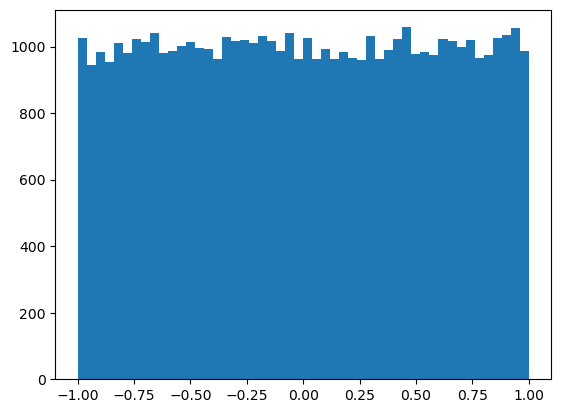

In [4]:
# Look at the z-direction values
n = 50000
values = np.empty(n)
for i in range(n):
    x = random.gauss()
    y = random.gauss()
    z = random.gauss()
    values[i] = z / np.sqrt(x**2 + y**2 + z**2)
plt.hist(values, bins=50);

Look much flatter than I would expect.  I would expect less values at the "poles" (see below though)

In [5]:
# another way of writing the same algorithm
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

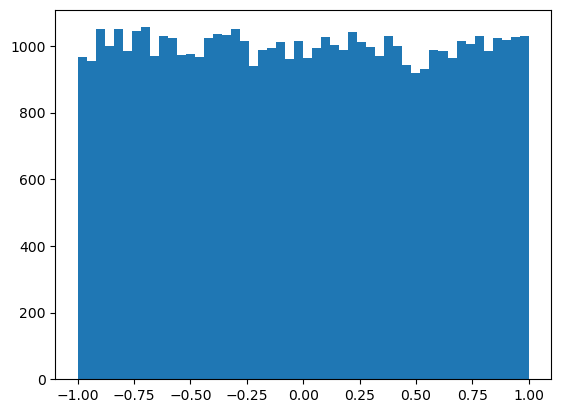

In [6]:
vec = sample_spherical(50000, ndim=3)

plt.hist(vec[2], bins=50);

No difference.

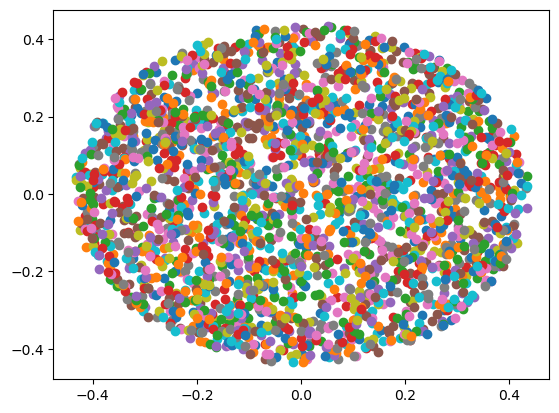

In [7]:
# Let's look at the spherical distribution, first near the pole
for i in range(50000):
    if vec[0, i] < -0.9:
        plt.plot(vec[1, i], vec[2, i], 'o')

Look's good to me.  Nicely distributed with perhaps a higher density near the outside.

In [8]:
# Check the outside diameter, way #1
print (np.sin(np.arccos(0.9)))

0.4358898943540673


In [9]:
# Check the outside diameter, way #2
print (np.sqrt(1-0.9**2))

0.4358898943540673


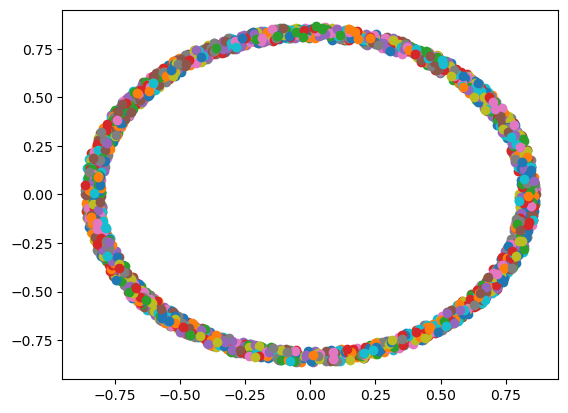

In [10]:
# Look at a ring
for i in range(50000):
    if (vec[0, i] < -0.5 and vec[0, i] > -0.6):
        plt.plot(vec[1, i], vec[2, i], 'o')

In [11]:
# Now calculate the variance in z direction
print (np.var(vec[0]))

0.3313427699364854


In [63]:
# Check the variance of the random step +- 1
np.var((2*np.random.randint(2, size=50000)-1))

0.9999704064000003

So, looks good.  The distribution works because although the circles get smaller in diameter at the pole, for each dz, they get thicker in x/y.  And the variance is 1/3 in each direction.

## Calculations Behind the LaTeX

In [16]:
# One-dimensional random walk, with swimming at wr = 0.03 m/s for dt = 180 s steps
wr = 0.03 # m/s
dt = 180 # s
ds = wr * 180
ds # m

5.3999999999999995

In [17]:
# If swimming is in 3-D, the variance in z is one-third the variance of a 1-D process
dz = np.sqrt(ds**2 / 3)
dz**2 # m^2

9.719999999999997

In [19]:
# Effective Diffusivity of the pteropods
# 0.15 * dz^2 / 2 * dt
ks = 0.15 * dz**2 / (2 * dt)
ks # m2/s

0.004049999999999999

In [20]:
# Calculate the small vertical swimming tendency, given the exponential lengthscale of L = 80 m
L = 80 # m
ws = ks / L
ws # m/s

5.0624999999999984e-05

In [21]:
# Needed random step given a time scale of 5 s
dt_comp = 5 # 2
dz_needed = np.sqrt(2 * dt_comp * ks)
dz_needed # m

0.20124611797498104